In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
import numpy as np
import lmfit

In [2]:
#caminhos para fazer os DataFrames
df_fermi = pd.read_csv ("CSVs\Dados_Fermi.csv")
df_energia = pd.read_csv("CSVs\Dados_energia.csv")

## Métricas:

### Modelo Baseline:

In [3]:
# Calcular o erro quadrático médio - medindo o modelo baseline
from sklearn.metrics import mean_squared_error
def RMSE(x_teste, y_teste, modelo):
    y_verdadeiro = y_teste
    y_previsao = modelo.predict(x_teste)

    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    

    return print(f"O RMSE do modelo baseline foi de {RMSE}, porcentagem em relação a média: {abs((RMSE/y_teste.mean()) * 100)}.")

#### Para a energia de fermi:

In [4]:
# Define o tamanho dos dados de teste e de treino e cria os dataframes

from sklearn.model_selection import train_test_split

#escolhe o tamanho do nosso teste
TAMANHO_TESTE = 0.1
# fixa quais dados que vão ser selecionados para teste e treino
SEMENTE_ALEATORIA = 24569
DATASET_NAME = "df_fermi"
# faz uma lista de features que queremos usar, no caso são todas
FEATURES = list(df_fermi.keys())
# tira o nosso target entre as features
FEATURES.remove("Fermi_energy")
FEATURES.remove("Unnamed: 0")
#o que queremos achar
TARGET = ["Fermi_energy"]


indices = df_fermi.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino_fe = df_fermi.loc[indices_treino]
df_teste_fe = df_fermi.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
x_treino_fe = df_treino_fe.reindex(FEATURES, axis=1).values
y_treino_fe = df_treino_fe.reindex(TARGET, axis=1).values
x_teste_fe = df_teste_fe.reindex(FEATURES, axis=1).values
y_teste_fe = df_teste_fe.reindex(TARGET, axis=1).values


### Baseline média:

In [5]:
# Criar um modelo regressor "dummy"
from sklearn.dummy import DummyRegressor

# cria o modelo
modelo_baseline_fe = DummyRegressor()

# treina o modelo
modelo_baseline_fe.fit(x_treino_fe, y_treino_fe)

# realiza uma previsão usando o modelo treinado
previsao_fe = modelo_baseline_fe.predict(x_teste_fe)

print(previsao_fe)

[-4.95704166 -4.95704166 -4.95704166 ... -4.95704166 -4.95704166
 -4.95704166]


In [6]:
# testando a qualidade do nosso modelo:
RMSE(x_teste_fe, y_teste_fe, modelo_baseline_fe )

O RMSE do modelo baseline foi de 0.30151342169015477, porcentagem em relação a média: 6.078721445684178.


### Para energia por átomo:

In [7]:
# Criar os dados de teste e de treino

#escolhe o tamanho do nosso teste
tamanho_teste = 0.1
# fixa quais dados que vão ser selecionados para teste e treino
semente_aleatoria = 24569
# faz uma lista de features que queremos usar, no caso são todas
features = list(df_energia.keys())
# tira o nosso target entre as features
features.remove("energy_per_atom")
features.remove("Unnamed: 0")
#o que queremos achar
target = ["energy_per_atom"]


indices = df_energia.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=tamanho_teste, random_state= semente_aleatoria
)

df_treino_en = df_energia.loc[indices_treino]
df_teste_en = df_energia.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
x_treino_en = df_treino_en.reindex(features, axis=1).values
y_treino_en = df_treino_en.reindex(target, axis=1).values
x_teste_en = df_teste_en.reindex(features, axis=1).values
y_teste_en = df_teste_en.reindex(target, axis=1).values

### Baseline média

In [8]:
# Cria e testa o modelo de regressor "Dummy" para a energia por átomo
# cria o modelo
modelo_baseline_en = DummyRegressor()

# treina o modelo
modelo_baseline_en.fit(x_treino_en, y_treino_en)

# realiza uma previsão usando o modelo treinado
previsao_en = modelo_baseline_en.predict(x_teste_en)

print(previsao_en)

[-47.41313446 -47.41313446 -47.41313446 ... -47.41313446 -47.41313446
 -47.41313446]


In [9]:
# testando a qualidade do nosso modelo:
RMSE(x_teste_en, y_teste_en, modelo_baseline_en )

O RMSE do modelo baseline foi de 2.353630547946566, porcentagem em relação a média: 4.965411373597822.


# Modelo KNN

In [10]:
#Cria o algoritmo de identificação de vizinhos mais próximos;

def identificacaoknn(x_treino, y_treino, x_teste, y_teste, target_name): #Definir uma função para calcular os vizinhos, já que temos dois targets numéricos
    "Essa função utiliza os dados para calcular a previsão através de um intervalo de número de k-vizinhos e calcula o RMSE e erro percentual do modelo"
    media_teste = y_teste.mean()
    media_treino = y_treino.mean()

    from sklearn.metrics import mean_squared_error 
    from sklearn.neighbors import KNeighborsRegressor
    
    #variando o hiperparâmetro k, que corresponde ao numero de vizinhos
    numero_vizinhos = range(1, 101)
    rmse = []
    for n in numero_vizinhos: #for para testar
        # função para criar o modelo com a qtde n de vizinhos
        modelo_knn = KNeighborsRegressor(n_neighbors=n)

        # treina o modelo
        modelo_knn.fit(x_treino, y_treino)

        # realiza uma previsão usando o modelo treinado
        previsao = modelo_knn.predict(x_teste)
        #print(previsao)

        y_verdadeiro = y_teste
        y_previsao = modelo_knn.predict(x_teste)
        RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
        rmse.append(RMSE)
        
    fig, ax1 = plt.subplots(1,1)
    ax1.plot(numero_vizinhos, rmse, c = 'r')
    ax1.set_xlabel('Número de vizinhos')
    ax1.set_ylabel('RMSE (eV)')
    
    fig, ax2 = plt.subplots(1,1)
    ax2.scatter(y_verdadeiro, y_previsao, c = 'orange')
    ax2.plot(y_verdadeiro,y_verdadeiro,label="y = x", c = 'r') ; ax2.legend(fontsize='small')
    
    if target_name ==  'Energia de Fermi':
        ax2.set_title('Previsão k-NN para Energia de Fermi')
    if target_name == 'Energia por Átomo':
        ax2.set_title('Previsão k-NN para Energia por Átomo')

    ax2.set_xlabel('Verdadeiro (eV)')
    ax2.set_ylabel('Previsão (eV)')
    
    
    m = min(rmse)
    km = numero_vizinhos[rmse.index(m)]
    print(f"O RMSE do modelo k-NN usando k={km} foi de {m} eV. O erro percentual é, {abs((m/media_teste) * 100)} %")

O RMSE do modelo k-NN usando k=25 foi de 0.08594171465090313 eV. O erro percentual é, 1.7326450709851542 %


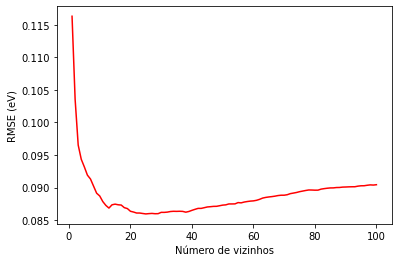

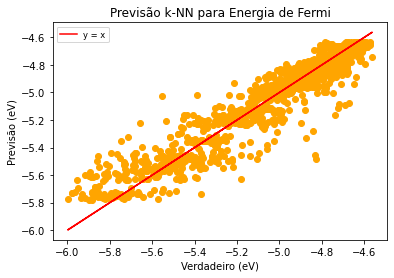

In [11]:
identificacaoknn(x_treino_fe, y_treino_fe, x_teste_fe, y_teste_fe, 'Energia de Fermi')

O RMSE do modelo k-NN usando k=3 foi de 0.8057468565124171 eV. O erro percentual é, 1.6998694247310895 %


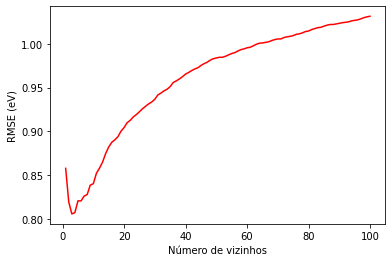

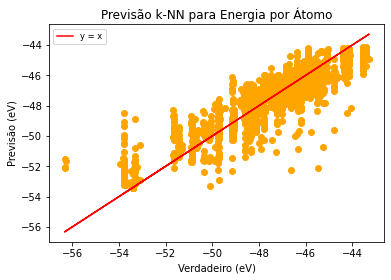

In [12]:
identificacaoknn(x_treino_en, y_treino_en, x_teste_en, y_teste_en, 'Energia por Átomo')

#### Para a energia de Fermi, o modelo de k-NN resultou em um RMSE cerca de 3.5 vezes menor que o baseline, já para a energia total por átomo resultou em um RMSE cerca de 3 vezes menor que o baseline. Ou seja, comparando os dois modelos, o k-NN é melhor.

# Modelo Linear (não normalizado):

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Cria o modelo de regressão linear e realiza a predição, além de calcular o RMSE

def modelo_linear(x_treino, y_treino, x_teste, y_teste, target_name):
    # cria o modelo
    modelo_linear = LinearRegression()

    # treina o modelo
    modelo_linear.fit(x_treino, y_treino)

    # realiza uma previsão usando o modelo treinado
    previsao = modelo_linear.predict(x_teste)
    #print(previsao)

    y_verdadeiro = y_teste
    y_previsao = modelo_linear.predict(x_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    
    fig, ax2 = plt.subplots(1,1)
    ax2.scatter(y_verdadeiro, y_previsao, c = 'orange')
    ax2.plot(y_verdadeiro,y_verdadeiro,label="y=x", c = 'r') ; ax2.legend(fontsize='small')
    if target_name ==  'Energia de Fermi':
        ax2.set_title('Previsão linear para Energia de Fermi')
    if target_name == 'Energia por Átomo':
        ax2.set_title('Previsão linear para Energia por Átomo')
    ax2.set_xlabel('Verdadeiro (eV)')
    ax2.set_ylabel('Previsão (eV)')
    
    print(f"O modelo linear produziu um RMSE de {RMSE} eV")

### Energia de Fermi:

O modelo linear produziu um RMSE de 0.09438584636064312 eV


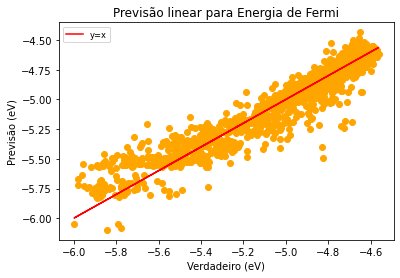

In [15]:
#Testando o modelo para a energia de Fermi:
modelo_linear(x_treino_fe, y_treino_fe, x_teste_fe, y_teste_fe, 'Energia de Fermi')

Para a energia de Fermi o modelo linear deu um resultado melhor que o baseline, mas pior que o kNN

### Energia por átomo

O modelo linear produziu um RMSE de 0.4226204459755578 eV


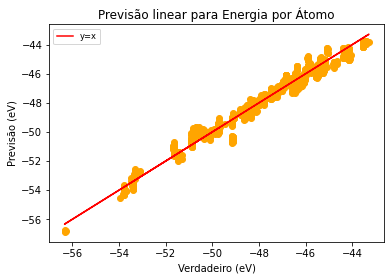

In [16]:
#Testando o modelo para energia por átomo
modelo_linear(x_treino_en, y_treino_en, x_teste_en, y_teste_en, 'Energia por Átomo')

Esse modelo se mostrou melhor para a energia por átomo do que o modelo baseline e kNN.

# Modelo Linear (normalizado):

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Cria o modelo linear normalizado e testa a predição
def modelo_linear_normalizado(x_treino, y_treino, x_teste, y_teste, target_name):

    normalizador_x = MinMaxScaler()
    normalizador_y = MinMaxScaler()

    normalizador_x.fit(x_treino)
    normalizador_y.fit(y_treino)
    # cria o modelo
    modelo_linear = LinearRegression()

    # treina o modelo
    modelo_linear.fit(
        normalizador_x.transform(x_treino),
        normalizador_y.transform(y_treino),
    )

    # realiza uma previsão usando o modelo treinado
    previsao = modelo_linear.predict(normalizador_x.transform(x_treino))
    previsao = normalizador_y.inverse_transform(previsao)
    #print(previsao)
    y_verdadeiro = y_teste
    y_previsao = modelo_linear.predict(normalizador_x.transform(x_teste))
    y_previsao = normalizador_y.inverse_transform(y_previsao)

    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    
    fig, ax2 = plt.subplots(1,1)
    ax2.scatter(y_verdadeiro, y_previsao, c = 'orange')
    ax2.plot(y_verdadeiro,y_verdadeiro,label="y=x", c = 'r') ; ax2.legend(fontsize='small')
    if target_name ==  'Energia de Fermi':
        ax2.set_title('Previsão linear (normalizado) para Energia de Fermi')
    if target_name == 'Energia por Átomo':
        ax2.set_title('Previsão linear (normalizado) para Energia por Átomo')
    ax2.set_xlabel('Verdadeiro (eV)')
    ax2.set_ylabel('Previsão (eV)')

    print(f"O RMSE do modelo linear normalizado foi de {RMSE} eV.")

### Energia de Fermi

O RMSE do modelo linear normalizado foi de 0.09438584636064316 eV.


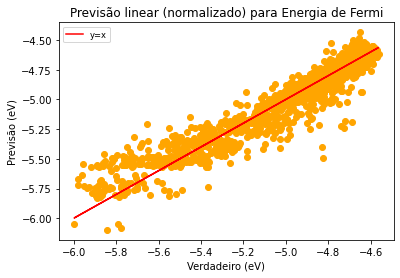

In [19]:
#Teste do modelo e RMSE
modelo_linear_normalizado(x_treino_fe, y_treino_fe, x_teste_fe, y_teste_fe,'Energia de Fermi' )

### Energia por Átomo

O RMSE do modelo linear normalizado foi de 0.42262044597555626 eV.


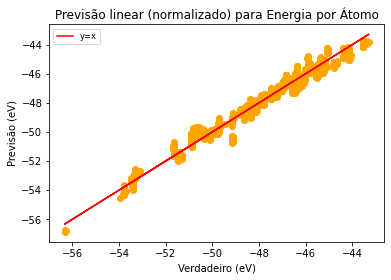

In [20]:
#Teste do modelo e RMSE
modelo_linear_normalizado(x_treino_en, y_treino_en, x_teste_en, y_teste_en,'Energia por Átomo')

Quando analisamo o RMSE, nota-se que a normalização não alterou a qualidade do modelo.

# Árvore de decisão:

### Testando Hiperparâmetros - teste das features e quantidade exemplos utilizados

In [21]:
from sklearn.tree import DecisionTreeRegressor

from itertools import product
def hiper_arvore(X_treino, y_treino, X_teste, y_teste):
    "Define o modelo de árvore de decisão e testando qual hiperparâmetro será melhor"
    # variar o número de exemplos que serão utilizados
    NUM_FOLHAS =list( range(10,100,10))
    NUM_FOLHAS.append(None)
    
    NUM_PROFUNDIDADE = list(range(10,100,10))
    NUM_PROFUNDIDADE.append(None)
    #cria uma biblioteca para RMSE
    RMSEl = {}

    #cria e testa o modelo para a variação de n° de folhas e profundidade: 
    for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
        modelo_dt = DecisionTreeRegressor(
            max_leaf_nodes=n_folhas,
            max_depth=n_profundidade,
            random_state=SEMENTE_ALEATORIA,
        )

        modelo_dt.fit(X_treino, y_treino)

        y_verdadeiro = y_teste
        y_previsao = modelo_dt.predict(X_teste)
        RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
        RMSEl.update({RMSE: [n_folhas, n_profundidade]})

    #vendo menor RMSE para identificar qual foi o melhor hiperparâmetro: 
    m = min(RMSEl.keys())
    print(
        f"O menor RMSE usando o modelo AD foi de {m:.3f} ev, usando max_leaf_nodes={RMSEl[m][0]} "
        f"e max_depth={RMSEl[m][1]}."
    )
    
    
    return RMSEl[m][0], RMSEl[m][1]

In [22]:
n_folhas_fe, n_profundidade_fe =  hiper_arvore(x_treino_fe, y_treino_fe, x_teste_fe, y_teste_fe)

O menor RMSE usando o modelo AD foi de 0.086 ev, usando max_leaf_nodes=50 e max_depth=None.


In [23]:
n_folhas_en, n_profundidade_en =  hiper_arvore(x_treino_en, y_treino_en, x_teste_en, y_teste_en)

O menor RMSE usando o modelo AD foi de 0.035 ev, usando max_leaf_nodes=None e max_depth=None.


## Definindo a árvore que usa os melhores hiperparâmetros identificados acima:

In [24]:
from sklearn import tree

def arvore(x_treino, y_treino, x_teste, y_teste, target_name,n_folhas, n_profundidade):
    "Define e testa o modelo de árvore de decisão"
    
    modelo_dt = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA, max_leaf_nodes=n_folhas,max_depth=n_profundidade,)

    # treina o modelo
    modelo_dt.fit(x_treino, y_treino)

    # realiza uma previsão usando o modelo treinado
    previsao = modelo_dt.predict(x_teste)
    y_verdadeiro = y_teste
    
    y_previsao = modelo_dt.predict(x_teste)

    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    
    fig, ax2 = plt.subplots(1,1)
    ax2.scatter(y_verdadeiro, y_previsao, c = 'orange')
    ax2.plot(y_verdadeiro,y_verdadeiro,label="y=x", c = 'r') ; ax2.legend(fontsize='small')

    if target_name ==  'Energia de Fermi':
        ax2.set_title('Previsão da arvore de decisão para Energia de Fermi')
        F = FEATURES
    if target_name == 'Energia por Átomo':
        ax2.set_title('Previsão da árvore de decisão para Energia por Átomo')
        F = features
    ax2.set_xlabel('Verdadeiro (eV)')
    ax2.set_ylabel('Previsão (eV)')
    
    # cria os objetos de figura e eixo
    fig, axe = plt.subplots(
        ncols=1,
        nrows=1,
        figsize=(7, 4),
        dpi=150,
    )

    # plota o grafo da árvore de decisão
    tree.plot_tree(
        modelo_dt,
        feature_names=F,
        ax=axe,
        impurity=False,
        filled=True,
        proportion=True,
        precision=2,
    )

    # mostra o plot para o usuário
    plt.show()


    print(f"O RMSE do modelo árvore de decisão foi de {RMSE} eV.")

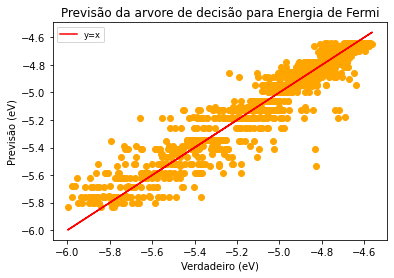

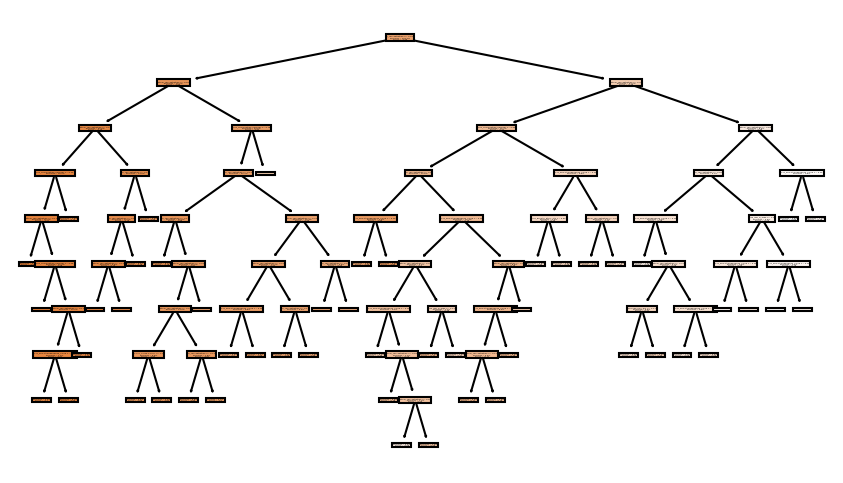

O RMSE do modelo árvore de decisão foi de 0.08565519410995863 eV.


In [25]:
# Teste da árvore para energia de fermi
arvore(x_treino_fe, y_treino_fe, x_teste_fe, y_teste_fe,'Energia de Fermi' ,n_folhas_fe, n_profundidade_fe)

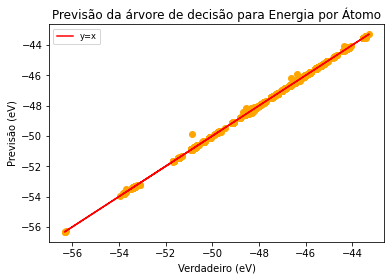

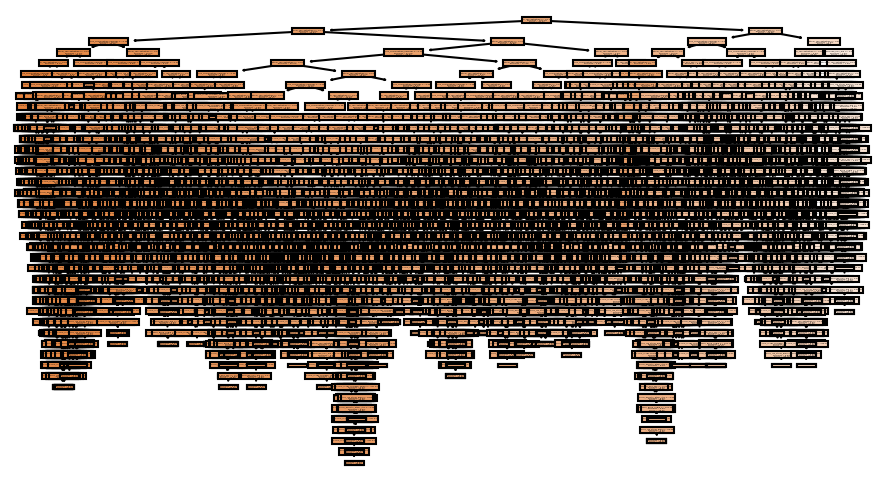

O RMSE do modelo árvore de decisão foi de 0.034933276927750445 eV.


In [27]:
# Teste da árvore para enregia por átomo
arvore(x_treino_en, y_treino_en, x_teste_en, y_teste_en,'Energia por Átomo' ,n_folhas_en, n_profundidade_en)

## Floresta Aleatória

### definindo os melhores hiperparâmetros para a floresta aleatória

In [28]:
from itertools import product
from sklearn.ensemble import RandomForestRegressor


def hiper_floresta(x_treino, y_treino, x_teste, y_teste, target_name):
    "Função que define modelo de floresta aleatória e testa qual hiperparâmetro será melhor"
    NUM_ARVORES = [100,200,300]
    NUM_FOLHAS = [None,100,20]
    NUM_PROFUNDIDADE = [None,5,10]
    RMSEl = {}

    #Variar o número dos hiperparâmetros
    for n_folhas, n_profundidade, n_arvores in product(
        NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
    ):
        modelo_rf = RandomForestRegressor(
            n_estimators=n_arvores,
            max_leaf_nodes=n_folhas,
            max_depth=n_profundidade,
            random_state=SEMENTE_ALEATORIA,
            n_jobs=4,
        )

        modelo_rf.fit(x_treino, y_treino.ravel()) 

        y_verdadeiro = (y_teste)
        y_previsao = modelo_rf.predict(x_teste)
        
        #testa RMSE para cada caso, que identificará o melhor hiperparâmetro
        RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False) 
        RMSEl.update ({RMSE: [n_folhas, n_profundidade, n_arvores]})
    
    m = min(RMSEl.keys())

    print(
        f"O menor RMSE achado do modelo RF usando para target_name "
        f"n_estimators={RMSEl[m][2]} max_leaf_nodes={RMSEl[m][0]} "
        f"e max_depth={RMSEl[m][1]} foi de {m} eV."
    )
    return RMSEl[m][0], RMSEl[m][1], RMSEl[m][2]

In [29]:
n_folhas_fe, n_profundidade_fe, n_arvores_fe = hiper_floresta(x_treino_fe, y_treino_fe, x_teste_fe, y_teste_fe, "Energia de Fermi")

O menor RMSE achado do modelo RF usando para target_name n_estimators=300 max_leaf_nodes=None e max_depth=None foi de 0.08088742588577416 eV.


In [30]:
n_folhas_en, n_profundidade_en, n_arvores_en = hiper_floresta(x_treino_en, y_treino_en, x_teste_en, y_teste_en, "Energia por atomo")

O menor RMSE achado do modelo RF usando para target_name n_estimators=100 max_leaf_nodes=None e max_depth=None foi de 0.02613040666296913 eV.


## Fazendo a floresta aleatória com os parâmetros escolhidos pela função acima:

In [31]:

def floresta(x_treino, y_treino, x_teste, y_teste, target_name, n_folhas, n_profundidade, n_arvores):
    "Teste e treino do modelo"
    # alterando o formato do target
    #print(y_treino.shape, y_teste.shape)
    y_treino = y_treino.ravel()
    y_teste = y_teste.ravel()
    #print(y_treino.shape, y_teste.shape)

    # cria o modelo
    modelo_rf = RandomForestRegressor(random_state=SEMENTE_ALEATORIA,n_estimators=n_arvores, max_leaf_nodes=n_folhas,max_depth=n_profundidade)

    # treina o modelo
    modelo_rf.fit(x_treino, y_treino)

    # realiza uma previsão usando o modelo treinado
    previsao = modelo_rf.predict(x_teste)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(x_teste)

    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    
    #Criar gráficos
    fig, ax2 = plt.subplots(1,1)
    ax2.scatter(y_verdadeiro, y_previsao, c = 'orange')
    ax2.plot(y_verdadeiro,y_verdadeiro,label="y=x", c = 'r') ; ax2.legend(fontsize='small')

    if target_name ==  'Energia de Fermi':
        ax2.set_title('Previsão da floresta aleatória para Energia de Fermi')
        F = FEATURES
    if target_name == 'Energia por Átomo':
        ax2.set_title('Previsão da floresta aleatória para Energia por Átomo')
        F = features
    ax2.set_xlabel('Verdadeiro (eV)')
    ax2.set_ylabel('Previsão (eV)')
    
    importancia = modelo_rf.feature_importances_
    desvio_padrao = np.std(
        [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
    )

    serie_importancia = pd.Series(importancia, index=F)

    fig, axe = plt.subplots()
    serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe, color = 'g')
    axe.set_ylabel("Redução média da impureza")
    plt.show()


    print(f"O RMSE do modelo floresta aleatória para {target_name} foi de {RMSE} eV.")

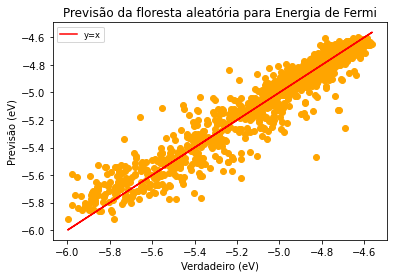

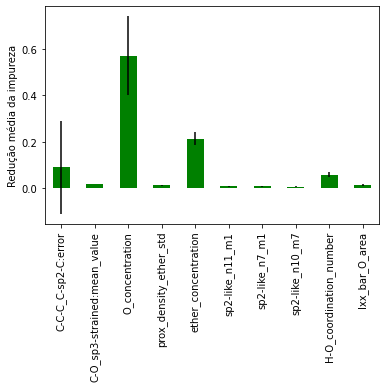

O RMSE do modelo floresta aleatória para Energia de Fermi foi de 0.08088742588577415 eV.


In [32]:
#Teste do modelo para energia de fermi;
floresta(x_treino_fe, y_treino_fe, x_teste_fe, y_teste_fe,'Energia de Fermi' ,n_folhas_fe, n_profundidade_fe, n_arvores_fe )

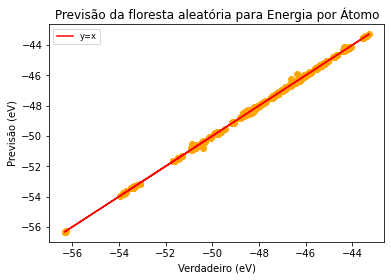

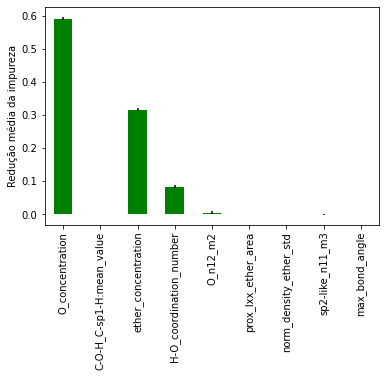

O RMSE do modelo floresta aleatória para Energia por Átomo foi de 0.02613040666296919 eV.


In [33]:
#Teste do modelo para energia por átomo:
floresta(x_treino_en, y_treino_en, x_teste_en, y_teste_en,'Energia por Átomo',n_folhas_en, n_profundidade_en, n_arvores_en)

# Classificação de Corrugação

In [34]:
#criando dataframe com todos os atributos
bruto = pd.read_csv('Neutral_Graphene_Oxide_Nanoflake_Dataset.zip')

# Excluir as colunas que tem NaN
bruto_completo = bruto.dropna(axis = 1, how ='any')

del bruto_completo['file_name']
del bruto_completo['charge_state']
del bruto_completo['ionization_potential']
del bruto_completo['electron_affinity']

E = []
i = 0
while i < len(bruto_completo['C']):
    E.append(bruto_completo['total_energy'][i]/bruto_completo['atom_number_total'][i])
    i = i+1
df = bruto_completo.assign(energy_per_atom = E)

del df['Shape']
del df['max_oop']
del df['mae_oop']
del df['rmse_oop']
del df['residual_oop']

In [35]:
#função para fazer histograma
def histograma(x, density=False, c = 'r', bins = 'sqrt', save = False, legendas = ['x', 'Frequência']):
    '''
    Plota um histograma a partir de uma lista de dados.
    Argumentos obrigatórios:
    - x: Lista dos valores da medição/dados
    
    Argumentos opcionais:
    - Density: bool que, se for True, faz com que o histograma mostre densidade de probabilidade (default: density=False)
    - c: string para a cor das barras do histograma (default: c = 'r')
    - bins: método de determinação do tamanho de intervalos do histograma (default: bins = 'sqrt')
    - save: string com o nome do arquivo png para salvar o grafico. Se save = False, então não irá salvar. (default: save = False)
    - legendas: lista das strings de legenda dos eixos (default: legendas = ['x', 'Frequência'])
    
    '''
    config = {'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.edgecolor': '.4',
    'axes.labelcolor': '.0',
    'axes.titlesize': 'large',
    'axes.labelsize': 'medium',
    'figure.autolayout': True,
    'figure.figsize': (4.5, 3.5),
    'font.family': ['serif'],
    'font.size': 10.0,
    'grid.linestyle': '--',
    'legend.facecolor': '.9',
    'legend.frameon': True,
    'savefig.transparent': True,
    'text.color': '.0',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',}

    plt.style.use(['seaborn-whitegrid', 'seaborn-paper', 'seaborn-muted', config])
    fig,axh = plt.subplots(1,1)
    H = plt.hist(x,bins = bins, color = c,density = density)
    axh.set_ylabel(legendas[1],fontsize=12)
    axh.set_xlabel(legendas[0],fontsize=12)
    if save != False:
        plt.savefig(save, dpi=200)

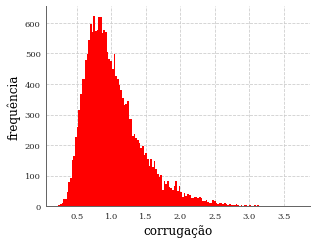

In [36]:
histograma(df['std_oop'], legendas = ['corrugação', 'frequência'])

In [37]:
logic = df["std_oop"] <= 0.8
print(len(df.loc[logic]),'baixa')
logic = (df["std_oop"] > 0.8) & (df["std_oop"] <= 1.2)
print(len(df.loc[logic]),'media')
logic = (df["std_oop"] > 1.2)
print(len(df.loc[logic]),'alta')

6760 baixa
7957 media
5679 alta


In [38]:
df['oop_categorico'] = None

logic = df["std_oop"] <= 0.8
df.loc[logic, 'oop_categorico'] = 'baixa'
logic = (df["std_oop"] > 0.8) & (df["std_oop"] <= 1.2)
df.loc[logic, 'oop_categorico'] = 'media'
logic = (df["std_oop"] > 1.2)
df.loc[logic, 'oop_categorico'] = 'alta'
print(df)

         C    H    O  atom_number_total  C_concentration  H_concentration  \
0      232   72   40                344         0.674419         0.209302   
1      232   71   39                342         0.678363         0.207602   
2      232   72   40                344         0.674419         0.209302   
3      232   72   40                344         0.674419         0.209302   
4      232   72   40                344         0.674419         0.209302   
...    ...  ...  ...                ...              ...              ...   
20391  576  166  300               1042         0.552783         0.159309   
20392  576  166  300               1042         0.552783         0.159309   
20393  576  166  300               1042         0.552783         0.159309   
20394  576  164  298               1038         0.554913         0.157996   
20395  576  166  300               1042         0.552783         0.159309   

       O_concentration  avg_diameter  max_diameter  min_diameter  ...  \
0 

## Classificação com k-NN

In [39]:
#separando teste e treino
import seaborn as sns
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61455
FEATURES = df.columns.drop('oop_categorico')
TARGET = ["oop_categorico"]

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

# observe que usamos o .values aqui pois queremos apenas os valores
X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values.ravel()
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values.ravel()

In [40]:
#treinando o modelo classificador
from sklearn.neighbors import KNeighborsClassifier

# cria o modelo
modelo_knn = KNeighborsClassifier()

# treina o modelo
modelo_knn.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knn.predict(X_teste)
print(previsao)

['baixa' 'media' 'media' ... 'baixa' 'baixa' 'baixa']


In [41]:
#calculando a acurácia da predição
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

Accuracy: 0.5553921568627451


## Classificação com Árvore de Decisão

In [42]:
from sklearn.tree import DecisionTreeClassifier

# cria o modelo
modelo_dt = DecisionTreeClassifier(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
print(y_teste)
print(previsao)



['baixa' 'media' 'media' ... 'baixa' 'baixa' 'alta']
['baixa' 'media' 'media' ... 'baixa' 'baixa' 'alta']


In [43]:
#calculando a acurácia da predição
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

Accuracy: 1.0


## Classificação com floresta aleatória

In [44]:
from sklearn.ensemble import RandomForestClassifier

# cria o modelo
modelo_rf = RandomForestClassifier(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_rf.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_rf.predict(X_teste)
print(previsao)

['baixa' 'media' 'media' ... 'baixa' 'baixa' 'media']


In [45]:
print("Accuracy:",metrics.accuracy_score(y_teste, previsao))

Accuracy: 0.9441176470588235
